# Electric Vehicle Presence Discovery


## EDA

In [2]:
#import packages
import datetime as dat
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats


In [11]:
#load data

df = pd.read_csv('Data/averagehour.csv')

In [12]:

#view data
df.head()

,Unnamed: 0,dataid,use,building_type,city,pv,house_construction_year,total_square_footage,car1_y
0,0,59,1.752956,Single-Family Home,Austin,0,2011.0,3825.0,0
1,1,77,1.638684,Single-Family Home,Austin,1,2009.0,2669.0,0
2,2,86,1.495249,Single-Family Home,Austin,0,1948.0,1788.0,0
3,3,93,1.051423,Single-Family Home,Austin,1,1993.0,2934.0,0
4,4,94,0.691208,Single-Family Home,Austin,0,1975.0,1713.0,0


In [13]:
#drop the unamed column
df = df.drop(['Unnamed: 0'], axis=1)

In [14]:
#view df
df.head()

,dataid,use,building_type,city,pv,house_construction_year,total_square_footage,car1_y
0,59,1.752956,Single-Family Home,Austin,0,2011.0,3825.0,0
1,77,1.638684,Single-Family Home,Austin,1,2009.0,2669.0,0
2,86,1.495249,Single-Family Home,Austin,0,1948.0,1788.0,0
3,93,1.051423,Single-Family Home,Austin,1,1993.0,2934.0,0
4,94,0.691208,Single-Family Home,Austin,0,1975.0,1713.0,0


## Categorical Variables

In [15]:
#Understand EV
df.groupby('car1_y').mean()

,dataid,use,pv,house_construction_year,total_square_footage
car1_y,,,,,
0,5167.928994,1.255491,0.573964,1989.668639,2191.050296
1,5295.800000,1.657467,0.888889,1994.777778,2475.233333


In [16]:
df.groupby('car1_y').dataid.nunique()

car1_y
0    169
1     45
Name: dataid, dtype: int64

In [17]:
PV_EV = pd.crosstab(index=df["car1_y"],
                       columns=[df['pv']])

PV_EV

pv,0,1
car1_y,,
0,72,97
1,5,40


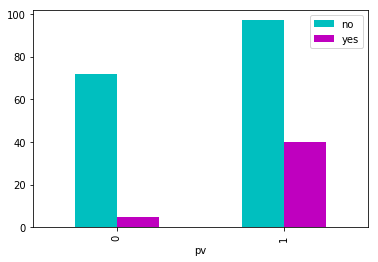

In [18]:
#create barchart to compare Survived with SEX
PV_EV.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['no','yes'])  

In [19]:
# building type and EV
buildingtype_EV = pd.crosstab(index=df["car1_y"],
                       columns=[df['building_type']])

buildingtype_EV

building_type,Apartment,Mobile Home,Single-Family Home,Town Home
car1_y,,,,
0,1,1,160,7
1,0,0,41,4


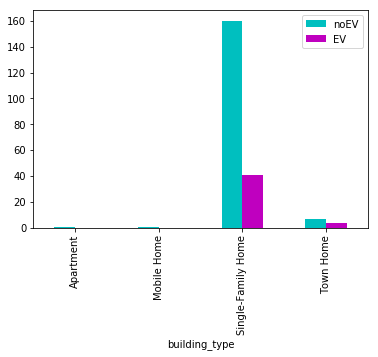

In [20]:
buildingtype_EV.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['noEV', 'EV'])

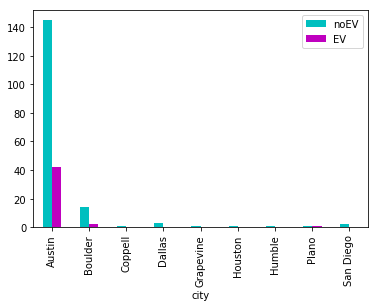

In [21]:
#location and eV
city_EV = pd.crosstab(index=df["car1_y"],
                       columns=[df['city']])
city_EV.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['noEV', 'EV'])

In [22]:
city_EV

city,Austin,Boulder,Coppell,Dallas,Grapevine,Houston,Humble,Plano,San Diego
car1_y,,,,,,,,,
0,145,14,1,3,1,1,1,1,2
1,42,2,0,0,0,0,0,1,0


## Continuous Features

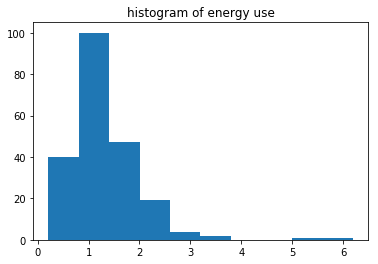

In [24]:
plt.hist(df['use'])
plt.title("histogram of energy use")
plt.show()

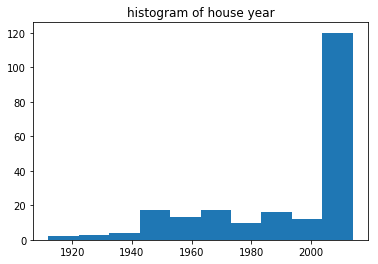

In [25]:
plt.hist(df['house_construction_year'])
plt.title("histogram of house year")
plt.show()

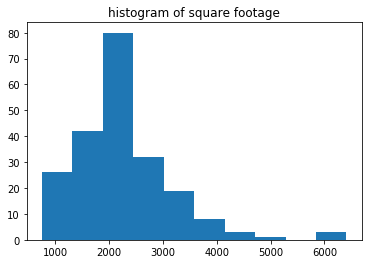

In [26]:
plt.hist(df['total_square_footage'])
plt.title("histogram of square footage")
plt.show()

# identifying outliers

In [31]:
#outliers for construction year
sortedconstructionyear = df.sort_values(by=['house_construction_year'])
q1, q3 = np.percentile(sortedconstructionyear['house_construction_year'], [25,75])
IQR = q3 - q1
lowerbound = q1 -(1.5*IQR)
upperbound = q3 +(1.5*IQR)
df = df.loc[(df['house_construction_year']>lowerbound)&(df['house_construction_year']<upperbound)]

In [32]:
#outliers for square footage
sortedsqfeet = df.sort_values(by=['total_square_footage'])
q1, q3 = np.percentile(sortedsqfeet['total_square_footage'], [25,75])
IQR = q3 - q1
lowerbound = q1 -(1.5*IQR)
upperbound = q3 +(1.5*IQR)
df = df.loc[(df['total_square_footage']>lowerbound)&(df['total_square_footage']<upperbound)]

In [35]:
#outliers for use
sorteduse = df.sort_values(by=['use'])
q1, q3 = np.percentile(sorteduse['use'], [25,75])
IQR = q3 - q1
lowerbound = q1 -(1.5*IQR)
upperbound = q3 +(1.5*IQR)
df = df.loc[(df['use']>lowerbound)&(df['use']<upperbound)]

# Plots


In [37]:
#plot EV with other features to see how they relate
groupbyEV =df.groupby('car1_y')

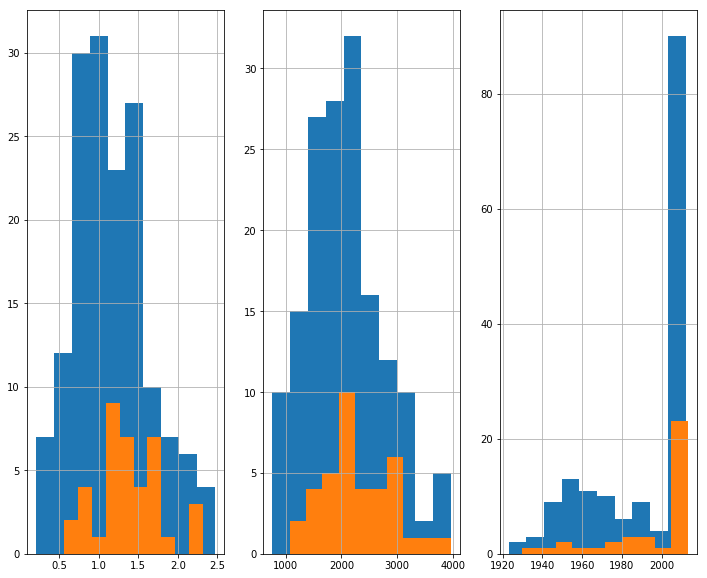

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,10))
for axis, col in zip(axes, ['use', 'total_square_footage', 'house_construction_year']):
    groupbyEV[col].hist(ax=axis)
    

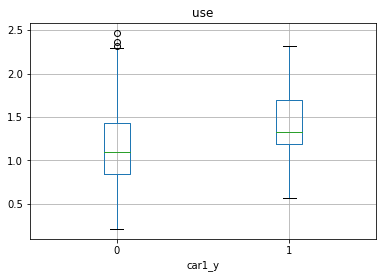

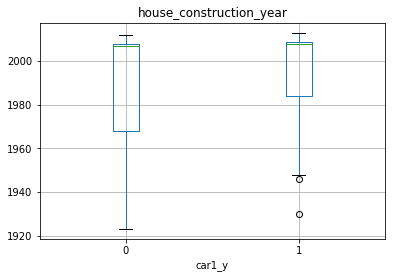

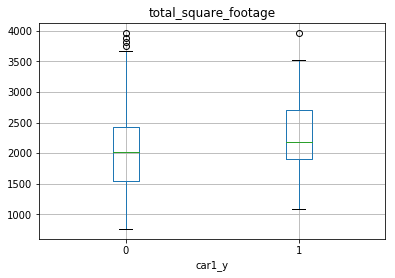

In [40]:
boxplotuse = df.boxplot(column=['use'], by = 'car1_y')
plt.suptitle("")
plt.show()
boxplotyear = df.boxplot(column=['house_construction_year'], by = 'car1_y')
plt.suptitle("")
plt.show()
boxplotsqfeet = df.boxplot(column=['total_square_footage'], by = 'car1_y')
plt.suptitle("")
plt.show()


# one hot encoding

In [41]:
#one hot encoding on building type
one_hot = pd.get_dummies(df['building_type'])
#drop the building type column
df = df.drop(['building_type'], axis=1)
#join in one hot encoding
df = df.join(one_hot)
df.head()

,dataid,use,city,pv,house_construction_year,total_square_footage,car1_y,Apartment,Mobile Home,Single-Family Home,Town Home
0,59,1.752956,Austin,0,2011.0,3825.0,0,0,0,1,0
1,77,1.638684,Austin,1,2009.0,2669.0,0,0,0,1,0
2,86,1.495249,Austin,0,1948.0,1788.0,0,0,0,1,0
3,93,1.051423,Austin,1,1993.0,2934.0,0,0,0,1,0
4,94,0.691208,Austin,0,1975.0,1713.0,0,0,0,1,0


In [42]:
#one hot encoding on city
one_hot = pd.get_dummies(df['city'])
#drop the building type column
df = df.drop(['city'], axis=1)
#join in one hot encoding
df = df.join(one_hot)
df.head()

,dataid,use,pv,house_construction_year,total_square_footage,car1_y,Apartment,Mobile Home,Single-Family Home,Town Home,Austin,Boulder,Dallas,Grapevine,Houston,Humble,Plano,San Diego
0,59,1.752956,0,2011.0,3825.0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,77,1.638684,1,2009.0,2669.0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,86,1.495249,0,1948.0,1788.0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,93,1.051423,1,1993.0,2934.0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,94,0.691208,0,1975.0,1713.0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [43]:
#one hot encoding on building type
one_hot = pd.get_dummies(df['house_construction_year'])
#drop the building type column
df = df.drop(['house_construction_year'], axis=1)
#join in one hot encoding
df = df.join(one_hot)
df.head()

,dataid,use,pv,total_square_footage,car1_y,Apartment,Mobile Home,Single-Family Home,Town Home,Austin,...,2002.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0
0,59,1.752956,0,3825.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,77,1.638684,1,2669.0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,86,1.495249,0,1788.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,93,1.051423,1,2934.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,94,0.691208,0,1713.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# Correlation